# POC VISUAL IMAGE TRANSFORMERS

# Importation librairies primaires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import time
# importation bibliothèque image
from matplotlib.image import imread

In [2]:
# on agrandit la fenretre de lecture
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_colwidth", 250)

In [17]:
# check version
conda list python

# packages in environment at C:\Users\ARMAN\anaconda3\envs\projet_8_bis_OC:
#
# Name                    Version                   Build  Channel
brotli-python             1.0.9            py38hd77b12b_7  
gitpython                 3.1.41                   pypi_0    pypi
google-api-python-client  2.108.0                  pypi_0    pypi
ipython                   8.12.2           py38haa95532_0  
ipython_genutils          0.2.0              pyhd3eb1b0_1  
opencv-python-headless    4.8.1.78                 pypi_0    pypi
python                    3.8.18               h1aa4202_0  
python-dateutil           2.8.2              pyhd3eb1b0_0  
python-dotenv             1.0.0                    pypi_0    pypi
python-fastjsonschema     2.16.2           py38haa95532_0  
python-json-logger        2.0.7            py38haa95532_0  
python-slugify            8.0.1                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


# 1) Importation du fichier

In [3]:
# importation dataframe clean
df = pd.read_csv("df_clean.csv")

In [4]:
# 5 premières données
df.head()

,product_name,image,product_category_tree,label_categories
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_name           1050 non-null   object
 1   image                  1050 non-null   object
 2   product_category_tree  1050 non-null   object
 3   label_categories       1050 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 32.9+ KB


In [6]:
# échantillonnage
df = df.groupby("label_categories").sample(frac = 0.20, random_state =0)

In [7]:
# randpmozation de l'ensemble
df = df.sample(frac = 1, random_state =0)

In [8]:
# mise à jour des index
df = df.reset_index()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  210 non-null    int64 
 1   product_name           210 non-null    object
 2   image                  210 non-null    object
 3   product_category_tree  210 non-null    object
 4   label_categories       210 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 8.3+ KB


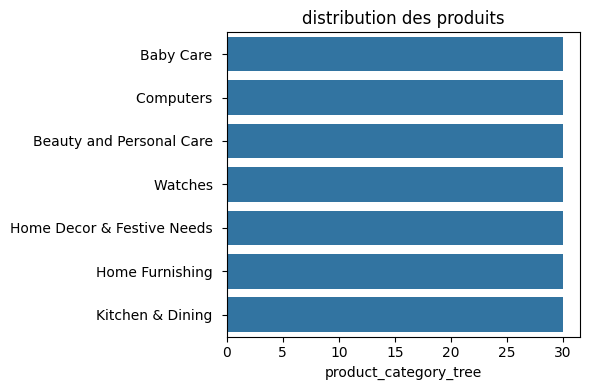

In [10]:
# graphuique de distribution des peroduits suite à échantillonnage
plt.rcParams["figure.figsize"] = [6,4]
sns.barplot(df['product_category_tree'].value_counts(), orient = "h")
plt.title('distribution des produits')

plt.tight_layout()


In [11]:
df.head(5)

,index,product_name,image,product_category_tree,label_categories
0,646,Seals Baby Girl's A-line Dress,f79ad10ae634dcfdab6625790d5c5d54.jpg,Baby Care,0
1,51,RoQ Slim Multimedia 105key Flexible Wired USB Flexible Keyboard,b4d35b6536b623c83b293eb3a1c02bba.jpg,Computers,2
2,797,Oxyglow Golden Glow Oxy Bleach & Fruit Massage Cream With Vitamin-E 200gm,9d20743a61f62fe6f9cdc5ff24d46d23.jpg,Beauty and Personal Care,1
3,774,"Offspring Embroidered, Solid Single Wrapper White, Pink",093bcad64d11c0aed903a8dd787ef069.jpg,Baby Care,0
4,280,"palito PLO 166 Analog Watch - For Girls, Women",009099b1f6e1e8f893ec29a7023153c4.jpg,Watches,6


In [12]:
# importation bibliothèque image
from matplotlib.image import imread

In [13]:
# importation os et lien vers le fichier image
import os
path = "C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 8- Réalisez un dashboard et assurez une veille technique/projet_8_AF_POC/Images/"

In [14]:
# fonction de listing et affichage des images

def list_image(category,nb_images,show = True):
    df_temp = df[df["product_category_tree"]==category]
    list_image = df_temp["image"].to_list()
    if show == True :
        print(f"- {category}:")
        for i in np.arange(0,nb_images,1) :
            plt.rcParams["figure.figsize"] = [8,16]
            plt.subplot(1,nb_images,i+1)
            plt.imshow(imread(path + list_image[i]))
            plt.tight_layout()
        plt.show()
    else : return list_image

- Baby Care :


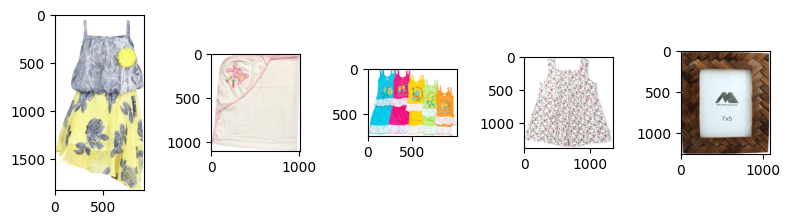

- Computers :


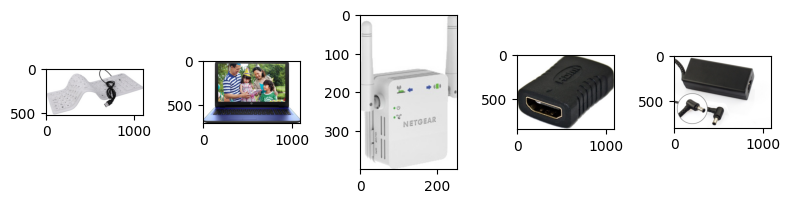

- Beauty and Personal Care :


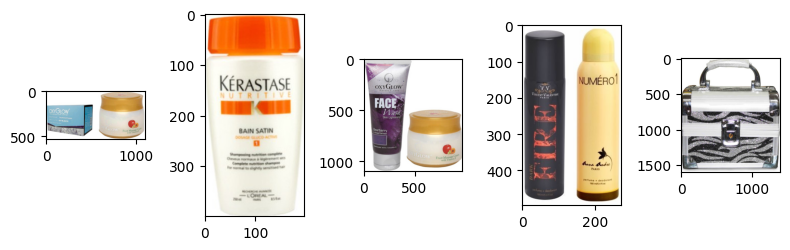

- Watches :


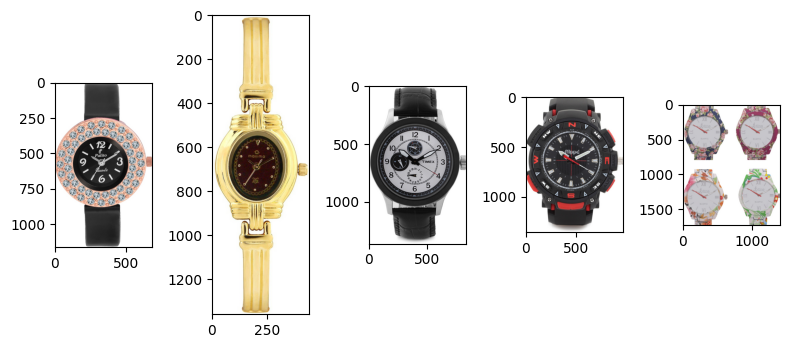

- Home Decor & Festive Needs :


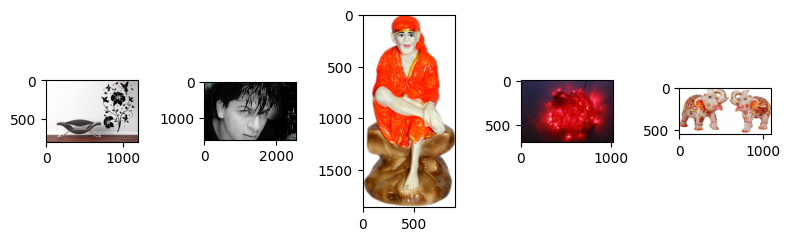

- Home Furnishing :


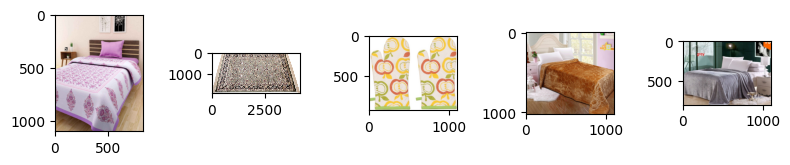

- Kitchen & Dining :


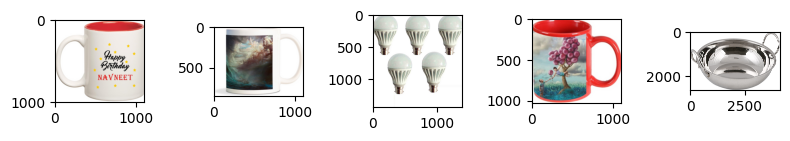

In [15]:
# Affichage des images par catégories
for categorty in df["product_category_tree"].unique() : 
    list_image(categorty, 5, show = True)

In [16]:
# Affichage des images par catégories
list_image(df["product_category_tree"].unique()[0],0,show = False)[0]

'f79ad10ae634dcfdab6625790d5c5d54.jpg'

# 2) Modélisation transfert learning CNN

In [18]:
import os
from os import listdir

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, confusion_matrix
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

import time

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory


In [19]:
# Création du path dans de datadrame
df["image_path"] = df["image"].apply(lambda x : path + x)
df.head()

,index,product_name,image,product_category_tree,label_categories,image_path
0,646,Seals Baby Girl's A-line Dress,f79ad10ae634dcfdab6625790d5c5d54.jpg,Baby Care,0,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 8- Réalisez un dashboard et assurez une veille technique/projet_8_AF_POC/Images/f79ad10ae634dcfdab6625790d5c5d54.jpg
1,51,RoQ Slim Multimedia 105key Flexible Wired USB Flexible Keyboard,b4d35b6536b623c83b293eb3a1c02bba.jpg,Computers,2,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 8- Réalisez un dashboard et assurez une veille technique/projet_8_AF_POC/Images/b4d35b6536b623c83b293eb3a1c02bba.jpg
2,797,Oxyglow Golden Glow Oxy Bleach & Fruit Massage Cream With Vitamin-E 200gm,9d20743a61f62fe6f9cdc5ff24d46d23.jpg,Beauty and Personal Care,1,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 8- Réalisez un dashboard et assurez une veille technique/projet_8_AF_POC/Images/9d20743a61f62fe6f9cdc5ff24d46d23.jpg
3,774,"Offspring Embroidered, Solid Single Wrapper White, Pink",093bcad64d11c0aed903a8dd787ef069.jpg,Baby Care,0,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 8- Réalisez un dashboard et assurez une veille technique/projet_8_AF_POC/Images/093bcad64d11c0aed903a8dd787ef069.jpg
4,280,"palito PLO 166 Analog Watch - For Girls, Women",009099b1f6e1e8f893ec29a7023153c4.jpg,Watches,6,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 8- Réalisez un dashboard et assurez une veille technique/projet_8_AF_POC/Images/009099b1f6e1e8f893ec29a7023153c4.jpg


In [20]:
# Préparation de l'image
def image_prep_fct(df) :
    prepared_images = []
    for image_num in range(len(df["image"])) :
        img = load_img(path+df["image"][image_num], target_size=(224,224))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images)
    return prepared_images_np

In [21]:
# Préparation des images
T0 = time.time()
images_np = image_prep_fct(df)
print(images_np.shape)
duration = time.time()-T0
print(f" temps de traitement {duration} secondes")

(210, 224, 224, 3)
 temps de traitement 11.676946640014648 secondes


In [120]:
images_np

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [22]:
# définition des variables
X = images_np
y = to_categorical(df['label_categories'])

In [23]:
# découpage pour train et test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30)
print(X_train.shape)
print(X_val.shape)

(147, 224, 224, 3)
(63, 224, 224, 3)


## 2.1) RESNET50

In [24]:
# modèle de classification
def create_model_fct_3() :
    # Récupération modèle pré-entraîné
    model0 = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

In [25]:
# Création du modèle
model4 = create_model_fct_3()

# Création du callback
model4_save_path4 = "./model4_best_weights.h5"
checkpoint = ModelCheckpoint(model4_save_path4, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [26]:
# entrainement
T0 = time.time()
history4 = model4.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks_list)
duration = time.time()-T0
print(f" temps de traitement {duration} secondes")

Epoch 1/5
5/5 [==============================] - ETA: 0s - loss: 3.9578 - accuracy: 0.2857
Epoch 1: val_loss improved from inf to 1.37441, saving model to .\model4_best_weights.h5
5/5 [==============================] - 16s 3s/step - loss: 3.9578 - accuracy: 0.2857 - val_loss: 1.3744 - val_accuracy: 0.5397
Epoch 2/5
5/5 [==============================] - ETA: 0s - loss: 0.9089 - accuracy: 0.6871
Epoch 2: val_loss improved from 1.37441 to 1.04810, saving model to .\model4_best_weights.h5
5/5 [==============================] - 12s 3s/step - loss: 0.9089 - accuracy: 0.6871 - val_loss: 1.0481 - val_accuracy: 0.6667
Epoch 3/5
5/5 [==============================] - ETA: 0s - loss: 0.2667 - accuracy: 0.9048
Epoch 3: val_loss improved from 1.04810 to 1.00590, saving model to .\model4_best_weights.h5
5/5 [==============================] - 13s 3s/step - loss: 0.2667 - accuracy: 0.9048 - val_loss: 1.0059 - val_accuracy: 0.7143
Epoch 4/5
5/5 [==============================] - ETA: 0s - loss: 0.2453

In [27]:
# Score du dernier epoch
T0 = time.time()
loss, accuracy = model4.evaluate(X_train, y_train, verbose=True)
print(f"Training Accuracy: {accuracy}")
print("________________")
loss, accuracy = model4.evaluate(X_val, y_val, verbose=True)
print(f"Validation Accuracy: {accuracy}")
duration = time.time()-T0
print("________________")
print(f" temps de traitement {duration} secondes")

5/5 [==============================] - 9s 2s/step - loss: 0.0303 - accuracy: 1.0000
Training Accuracy: 1.0
________________
2/2 [==============================] - 3s 2s/step - loss: 1.0593 - accuracy: 0.6825
Validation Accuracy: 0.682539701461792
________________
 temps de traitement 12.549060344696045 secondes


In [28]:
# Score de l'epoch optimal
T0 = time.time()
# Chargement du modèle
model4.load_weights(model4_save_path4)

loss, accuracy = model4.evaluate(X_train, y_train, verbose=True)
print(f"Training Accuracy: {accuracy}")
print("________________")
loss, accuracy = model4.evaluate(X_val, y_val, verbose=True)
print(f"Validation Accuracy: {accuracy}")
duration = time.time()-T0
print("________________")
print(f" temps de traitement {duration} secondes")

5/5 [==============================] - 8s 2s/step - loss: 0.0796 - accuracy: 0.9864
Training Accuracy: 0.9863945841789246
________________
2/2 [==============================] - 4s 2s/step - loss: 1.0059 - accuracy: 0.7143
Validation Accuracy: 0.7142857313156128
________________
 temps de traitement 12.5633225440979 secondes


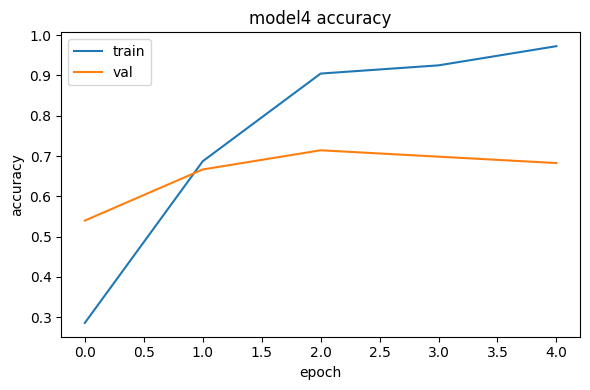

In [29]:
# model accuracy
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title(f'model4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.tight_layout()
plt.show()

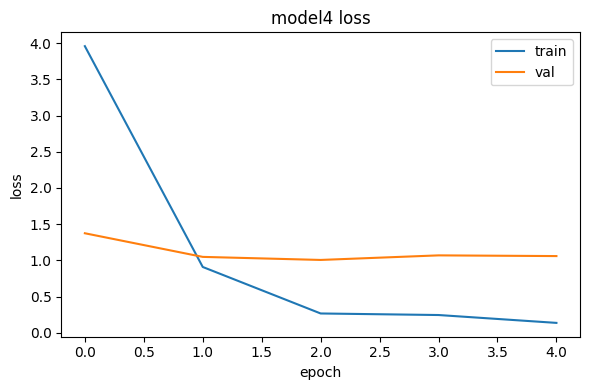

In [30]:
# model loss
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title(f'model4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.tight_layout()
plt.show()

In [126]:
history4.history['val_accuracy']

[0.5396825671195984,
 0.6666666865348816,
 0.7142857313156128,
 0.6984127163887024,
 0.682539701461792]

In [127]:
history4.history['val_loss']

[1.3744053840637207,
 1.0481020212173462,
 1.005898356437683,
 1.0690077543258667,
 1.0592846870422363]

## 3) Modélisation Visual Image Transformers

In [33]:
from transformers import ViTImageProcessor, ViTForImageClassification
from transformers import AutoImageProcessor, AutoModelForImageClassification, TrainingArguments, Trainer
from transformers import ViTFeatureExtractor, TFViTModel
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
import requests
import datasets
from PIL import ImageDraw, ImageFont, Image

C:\Users\ARMAN\anaconda3\envs\projet_8_bis_OC\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\ARMAN\anaconda3\envs\projet_8_bis_OC\lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\ARMAN\anaconda3\envs\projet_8_bis_OC\lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


### 3.1) Essais global du VIT

In [34]:
# chargement du modèle
model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)

In [35]:
processor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

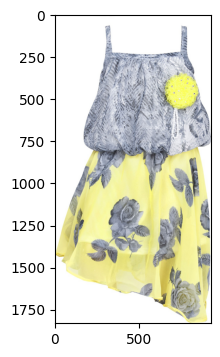

In [36]:
# test d'une image
plt.imshow(imread(df['image_path'][0]))

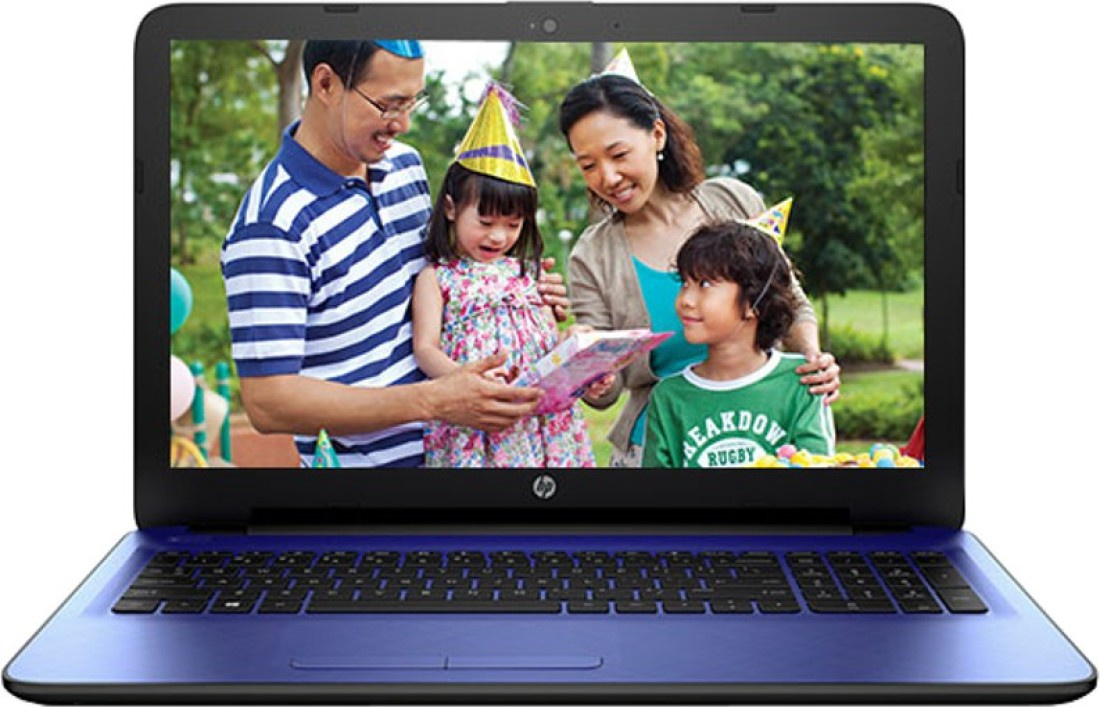

In [37]:
# image sélect
Image.open(df['image_path'][5])

In [38]:
# test du VIT avec le classifieur global
image = Image.open(df['image_path'][5])

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])


Predicted class: notebook, notebook computer


### 3.2) Essais de modélisation et tests

In [87]:
# fonction pour preprocess
def process_example(example):
    inputs = processor(Image.open(example['image_path']), return_tensors='pt')
    inputs['labels'] = example['label_categories']
    return inputs

In [88]:
# fonction pour preprocess
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([Image.open(x) for x in example_batch['image_path']], return_tensors='pt')
    # Don't forget to include the labels!
    inputs['labels'] = example_batch['label_categories']
    return inputs

In [89]:
df.head()

,index,product_name,image,product_category_tree,label_categories,image_path
0,646,Seals Baby Girl's A-line Dress,f79ad10ae634dcfdab6625790d5c5d54.jpg,Baby Care,0,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 8- Réalisez un dashboard et assurez une veille technique/projet_8_AF_POC/Images/f79ad10ae634dcfdab6625790d5c5d54.jpg
1,51,RoQ Slim Multimedia 105key Flexible Wired USB Flexible Keyboard,b4d35b6536b623c83b293eb3a1c02bba.jpg,Computers,2,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 8- Réalisez un dashboard et assurez une veille technique/projet_8_AF_POC/Images/b4d35b6536b623c83b293eb3a1c02bba.jpg
2,797,Oxyglow Golden Glow Oxy Bleach & Fruit Massage Cream With Vitamin-E 200gm,9d20743a61f62fe6f9cdc5ff24d46d23.jpg,Beauty and Personal Care,1,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 8- Réalisez un dashboard et assurez une veille technique/projet_8_AF_POC/Images/9d20743a61f62fe6f9cdc5ff24d46d23.jpg
3,774,"Offspring Embroidered, Solid Single Wrapper White, Pink",093bcad64d11c0aed903a8dd787ef069.jpg,Baby Care,0,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 8- Réalisez un dashboard et assurez une veille technique/projet_8_AF_POC/Images/093bcad64d11c0aed903a8dd787ef069.jpg
4,280,"palito PLO 166 Analog Watch - For Girls, Women",009099b1f6e1e8f893ec29a7023153c4.jpg,Watches,6,C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 8- Réalisez un dashboard et assurez une veille technique/projet_8_AF_POC/Images/009099b1f6e1e8f893ec29a7023153c4.jpg


In [90]:
# Modèle
model_id = "google/vit-base-patch16-224-in21k"
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

In [91]:
# préparation du jeu de données

In [92]:
# df pour vit
df_vit = df.copy()

In [93]:
# renommage
df_vit.rename(columns = {'product_category_tree':'labels'}, inplace = True)

In [94]:
# selection colonnes pertinentes
df_vit = df_vit[['image','labels','image_path','label_categories']]

In [95]:
# transformation en dataset
ds = datasets.Dataset.from_pandas(df_vit)
ds

Dataset({
    features: ['image', 'labels', 'image_path', 'label_categories'],
    num_rows: 210
})

In [96]:
# découpage pour train et test
ds = ds.train_test_split(test_size=0.2)

In [97]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'labels', 'image_path', 'label_categories'],
        num_rows: 168
    })
    test: Dataset({
        features: ['image', 'labels', 'image_path', 'label_categories'],
        num_rows: 42
    })
})

In [98]:
# test de la fonction en exemple
process_example(ds['train'][0])

{'pixel_values': tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9922, 0.9922],
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9843, 0.9843],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9922, 0.9922],
          [1.0000, 1.0000

In [99]:
prepared_ds = ds.with_transform(transform)

In [100]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])}

In [101]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

C:\Users\ARMAN\anaconda3\envs\projet_8_bis_OC\lib\site-packages\datasets\load.py:753: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.17.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [102]:
from transformers import ViTForImageClassification

labels = df_vit['labels'].unique().tolist()

model = ViTForImageClassification.from_pretrained(
    model_id,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)})

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [103]:
# préparation du donnéés du trainer

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./af",
    per_device_train_batch_size=32,
    save_strategy = "epoch",
    evaluation_strategy="epoch",
    num_train_epochs=5,
    save_steps=100,
    eval_steps=100,
    logging_steps=10,
    learning_rate=2e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to='tensorboard',
    load_best_model_at_end=True,
)

In [104]:
# Instanciation du trainer

from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds['train'],
    eval_dataset=prepared_ds['test'],
    tokenizer=processor,
)

In [105]:
# entrainement et résultats
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.583078,0.714286
2,1.619200,1.343955,0.785714
3,1.619200,1.153452,0.809524
4,0.938300,1.046157,0.809524
5,0.643800,1.013388,0.785714


***** train metrics *****
  epoch                    =        5.0
  total_flos               = 60625549GF
  train_loss               =     1.0671
  train_runtime            = 0:12:21.68
  train_samples_per_second =      1.133
  train_steps_per_second   =       0.04


In [106]:
# metriques finales
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        5.0
  eval_accuracy           =     0.7857
  eval_loss               =     1.0134
  eval_runtime            = 0:00:11.53
  eval_samples_per_second =       3.64
  eval_steps_per_second   =       0.52
